In [1]:
## Load Imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

DataSet Info

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
    Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8

        FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not fire

In [2]:
df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',skiprows=1,skipinitialspace = True)

In [3]:
df.reset_index()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [4]:
df.head(20)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
5,06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire
6,07,06,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire
7,08,06,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire
8,09,06,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire
9,10,06,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire


## PROFILING AND PRE_PROCESSING OF DATA

In [17]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,245,245,245,245,245,245,245,245,245,245,245,245,245,243
unique,32,4,1,19,62,18,39,173,166,198,106,174,126,2
top,01,07,2012,35,55,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,63,245,30,11,44,134,9,6,6,9,6,13,137


In [5]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

### Removing Spaces from Columns

In [6]:
for feature in df.columns:
    df[feature]=df[feature].str.strip()

### Cheking Unique Values

In [7]:
df['Temperature'].unique()

array(['29', '26', '25', '27', '31', '33', '30', '28', '32', '34', '35',
       '36', '37', '22', '24', nan, 'Temperature', '38', '39', '40', '42'],
      dtype=object)

In [8]:
## Find out which row is troubling 

index=df.index[df["Temperature"] == "Temperature"]
df.iloc[index]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


Observation:

Found that dataset has one bad row of column names

In [9]:
df.shape

(246, 14)

In [10]:
df=df.drop(index)

In [11]:
df.shape

(245, 14)

In [12]:
df.reset_index()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
241,242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
242,243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
243,244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


### Checking for Duplicate Values

In [13]:
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


### Checking Missing Values

In [14]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
RH             1
Ws             1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

Observations:

Not much values are null so we can replace them with mode

In [15]:
for feature in df.columns[:-1]:
    df[feature]=df[feature].fillna(df[feature].mode()[0])

In [16]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        2
dtype: int64

##### Changing Date Column as combined

In [18]:
print(df['day'].unique())
print(df['month'].unique())
print(df['year'].unique())

['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28'
 '29' '30' '31' 'Sidi-Bel Abbes Region Dataset']
['06' '07' '08' '09']
['2012']


Observations:

1. Day coloumn is having non-numeric variable so we will replace it with mode

In [19]:
index=df.index[df["day"] == "Sidi-Bel Abbes Region Dataset"]
df.iloc[index]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,07,2012,35,55,14,0,88.9,7.9,8,1.1,3,0.4,NaN


In [20]:
df['day'].iloc[index]=df['day'].mode()[0]

In [21]:
print(df['day'].unique())

['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28'
 '29' '30' '31']


In [22]:
df['Time']=df['day']+"/"+df['month']+"/"+df['year']

df.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Time
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,01/06/2012
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,02/06/2012
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,03/06/2012
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,04/06/2012
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,05/06/2012
5,06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire,06/06/2012
6,07,06,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire,07/06/2012
7,08,06,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire,08/06/2012
8,09,06,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,09/06/2012
9,10,06,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,10/06/2012


Dropping 3 columns day month year

In [23]:
df=df.drop('day',axis=1)
df=df.drop('month',axis=1)
df=df.drop('year',axis=1)

In [24]:
df.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Time
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,01/06/2012
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,02/06/2012


### Checking Datatypes

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 245
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temperature  245 non-null    object
 1   RH           245 non-null    object
 2   Ws           245 non-null    object
 3   Rain         245 non-null    object
 4   FFMC         245 non-null    object
 5   DMC          245 non-null    object
 6   DC           245 non-null    object
 7   ISI          245 non-null    object
 8   BUI          245 non-null    object
 9   FWI          245 non-null    object
 10  Classes      243 non-null    object
 11  Time         245 non-null    object
dtypes: object(12)
memory usage: 24.9+ KB


Replacing all the whitespaces from data rows 

In [26]:
df.columns = df.columns.str.replace(' ', '')

Observed a Error in below Row

In [30]:
index=df.index[df["FWI"] == "fire"]
df.iloc[index-1]

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Time
167,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,14/07/2012


Observations : 2 Issues with this row 

1. The DC column has wrong number spacing 
2. FWI has String value

In [31]:
df['FWI']=df['FWI'].iloc[index]=df['FWI'].mode()[0]
df['DC']=df['DC'].iloc[index-1]="14.7"

Changing all Datatypes

In [33]:
df['Temperature']=df['Temperature'].astype(float)
df['RH']=df['RH'].astype(float)
df['Ws']=df['Ws'].astype(float)
df['Rain']=df['Rain'].astype(float)
df['FFMC']=df['FFMC'].astype(float)
df['DMC']=df['DMC'].astype(float)
df['DC']=df['DC'].astype(float)
df['ISI']=df['ISI'].astype(float)
df['BUI']=df['BUI'].astype(float)
df['FWI']=df['FWI'].astype(float)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 245
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  245 non-null    float64
 1   RH           245 non-null    float64
 2   Ws           245 non-null    float64
 3   Rain         245 non-null    float64
 4   FFMC         245 non-null    float64
 5   DMC          245 non-null    float64
 6   DC           245 non-null    float64
 7   ISI          245 non-null    float64
 8   BUI          245 non-null    float64
 9   FWI          245 non-null    float64
 10  Classes      243 non-null    object 
 11  Time         245 non-null    object 
dtypes: float64(10), object(2)
memory usage: 24.9+ KB


## STATISTICAL ANALYSIS

### Cheking Outliers and Unbalance Data

<AxesSubplot:xlabel='Temperature'>

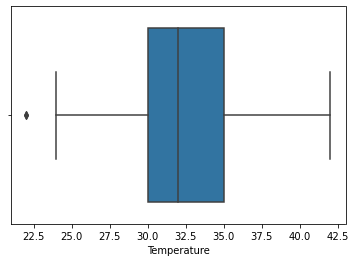

In [35]:
sns.boxplot(x=df["Temperature"])

<AxesSubplot:xlabel='Rain'>

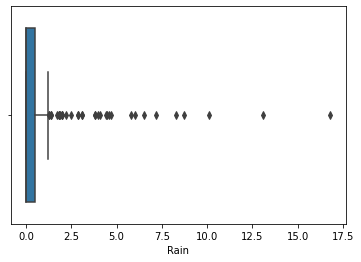

In [36]:
sns.boxplot(x=df["Rain"])

Observations:

Rain column has outliers

In [37]:
print(np.where(df["Rain"]>2))

(array([  2,   3,  14,  91,  92,  93,  94, 104, 105, 116, 124, 139, 140,
       141, 153, 160, 162, 163, 189, 190, 219, 220, 241], dtype=int64),)


<AxesSubplot:xlabel='RH'>

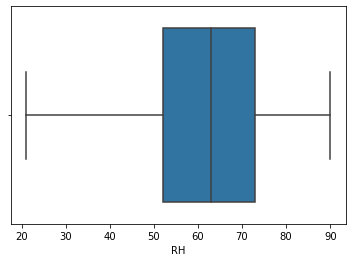

In [38]:
sns.boxplot(x=df["RH"])

<AxesSubplot:xlabel='Ws'>

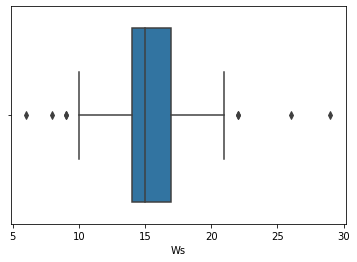

In [39]:
sns.boxplot(x=df["Ws"])

<AxesSubplot:xlabel='ISI'>

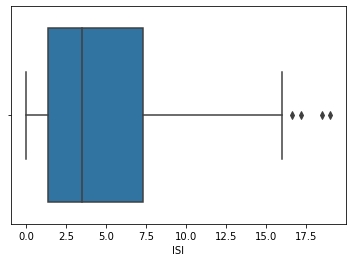

In [40]:
sns.boxplot(x=df["ISI"])

### Checking Multi-colinearity

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

dfCopy = df.copy()
dfCopy=dfCopy.dropna()

dfCopy['Classes']=dfCopy['Classes'].map({'not fire':0, 'fire':1})

# the independent variables set
X = dfCopy[['Temperature', 'RH', 'Ws' ,'Rain' ,'FFMC', 'DMC', 'DC' ,'ISI', 'BUI', 'FWI','Classes']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

        feature        VIF
0   Temperature   2.306070
1            RH   3.058631
2            Ws   1.307676
3          Rain   1.547827
4          FFMC   4.925190
5           DMC  35.160842
6            DC   0.002130
7           ISI   4.715743
8           BUI  33.515357
9           FWI   0.020651
10      Classes   3.400236


Observations:

1. We can see DMC and BUI are highly co-linear
2. Date Column is not required

### Feature Selection

[0.04731625 0.03841335 0.01410442 0.04754007 0.27876373 0.10439576
 0.         0.31843052 0.15103589 0.        ]


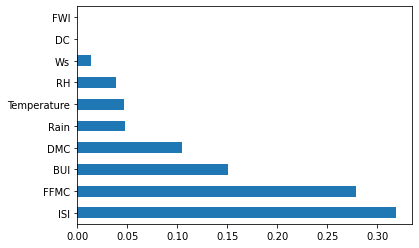

In [43]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

dfCopy = df.copy()
dfCopy=dfCopy.dropna()

X=dfCopy.drop(['Classes','Time'],axis=1)
y=dfCopy['Classes']

model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Observations:

1. Columns FWI and DC are not related to Target Value

<AxesSubplot:>

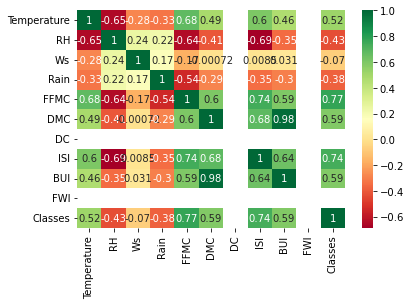

In [46]:
import seaborn as sns

dfCopy1 = df.copy()
dfCopy1=dfCopy1.dropna()

dfCopy1['Classes']=dfCopy1['Classes'].map({'not fire':0, 'fire':1})

sns.heatmap(dfCopy1.corr(), annot =True,cmap="RdYlGn")

Observations :

1. We can see Target is not related to FWI and DC

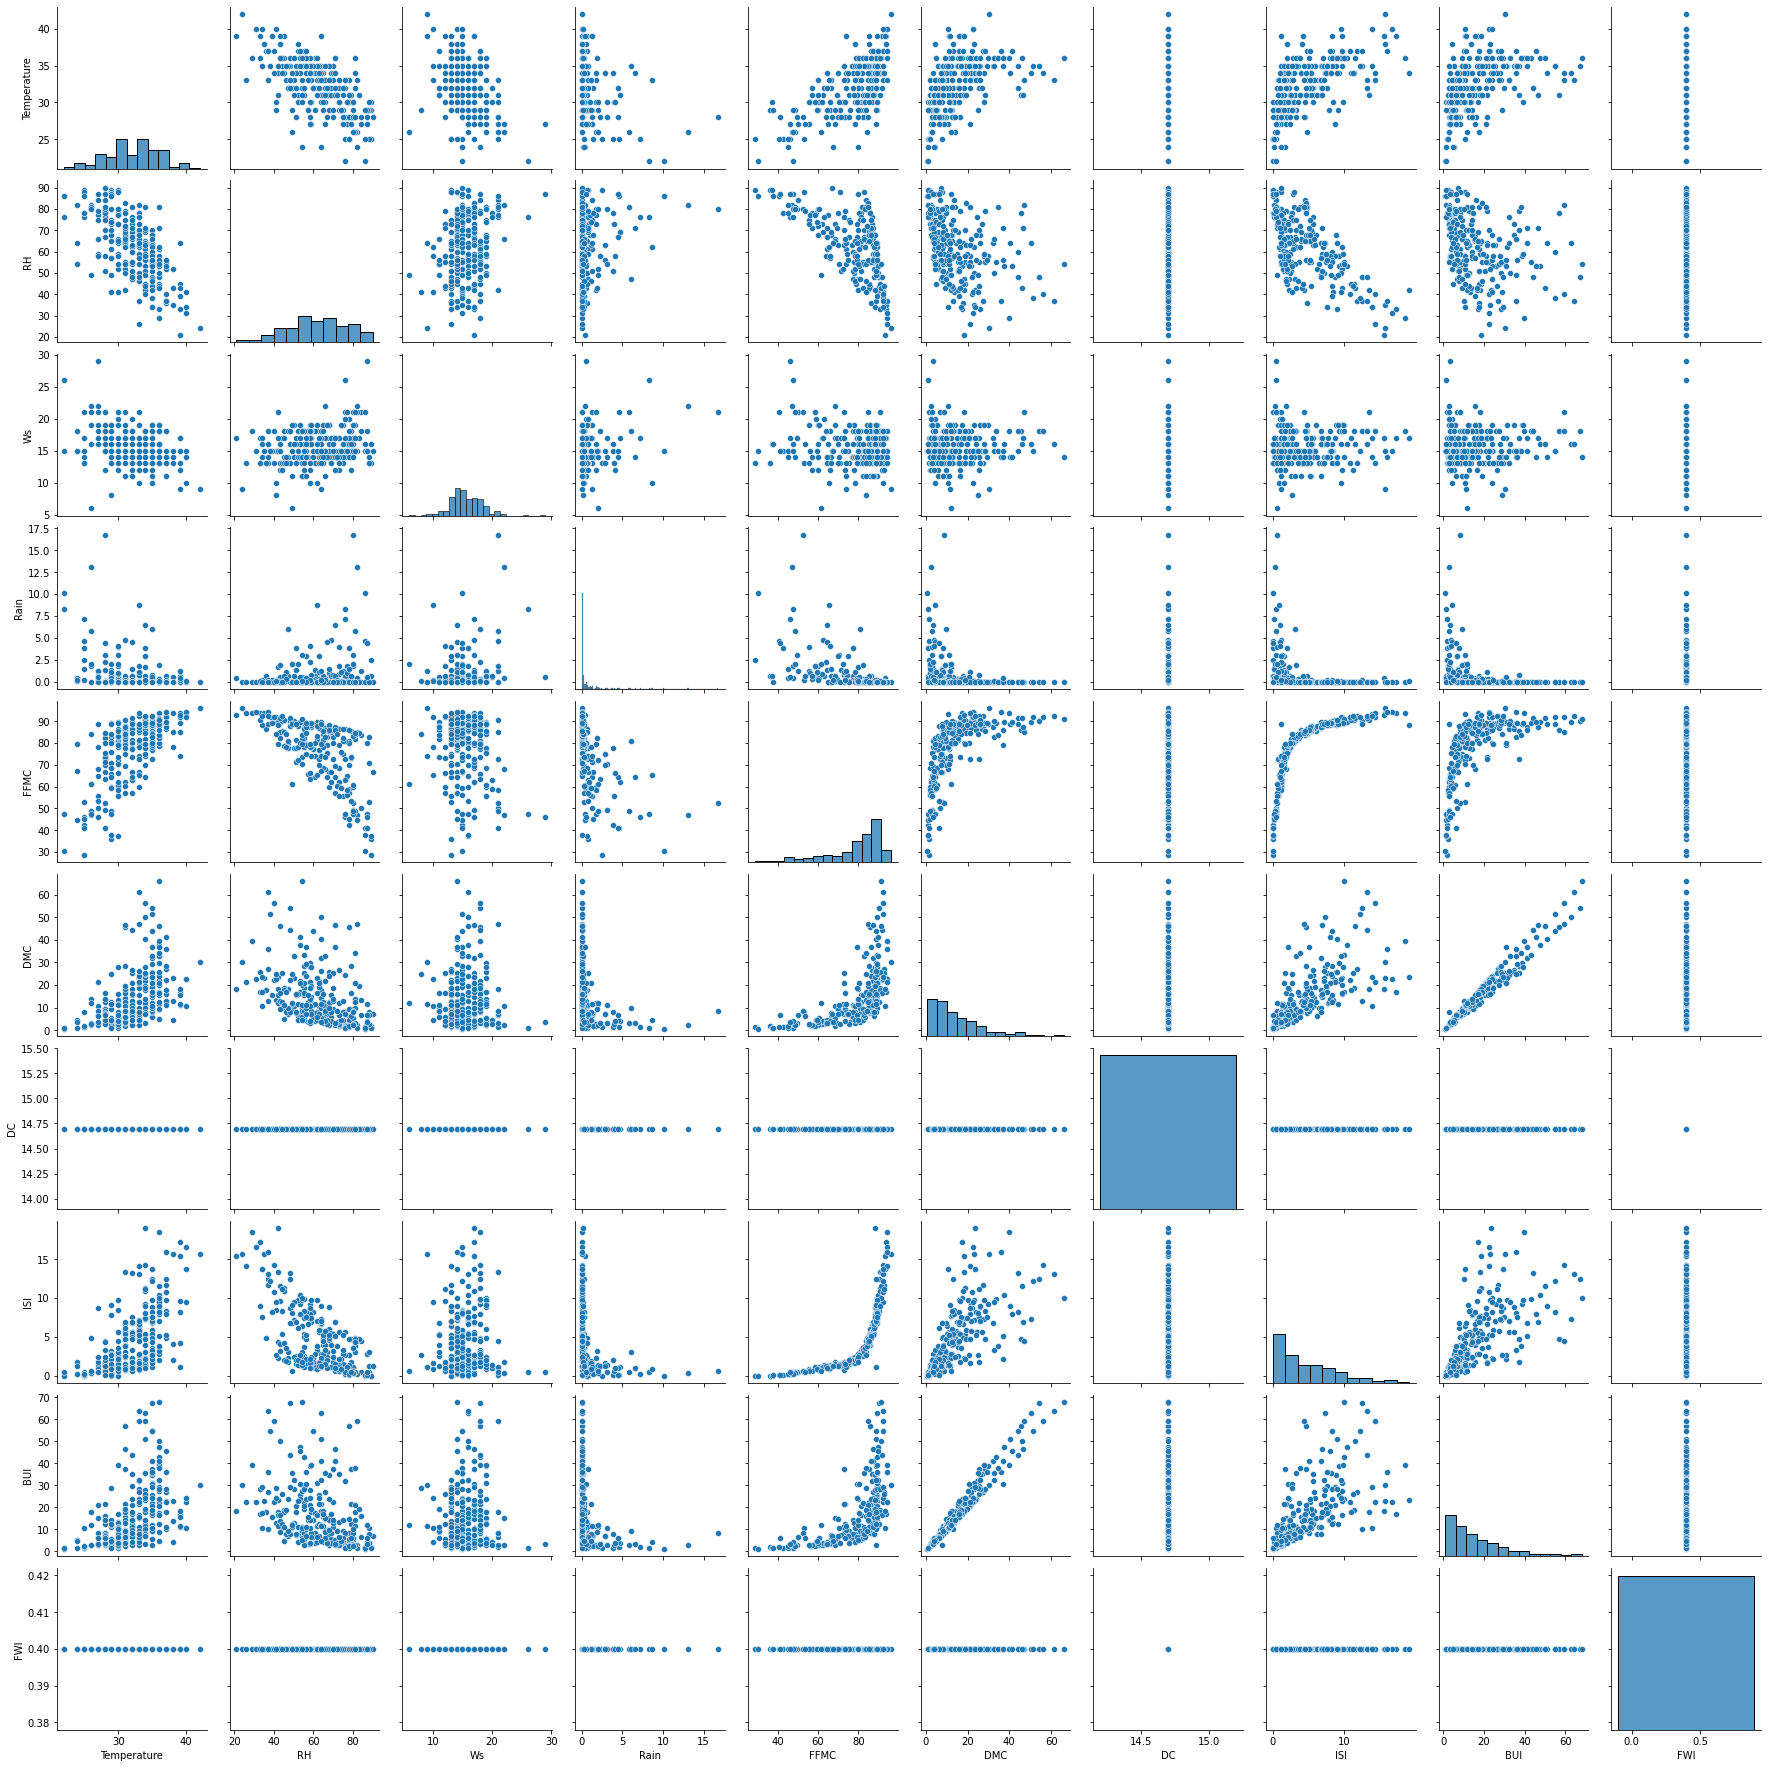

In [47]:
sns.pairplot(df)

Observations:
    
1. DMC and BUI are highly related causing multi-colinearity
2. FWI and DC are mostly unrelated to each property

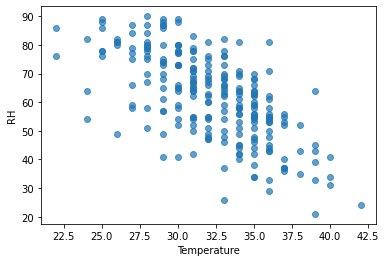

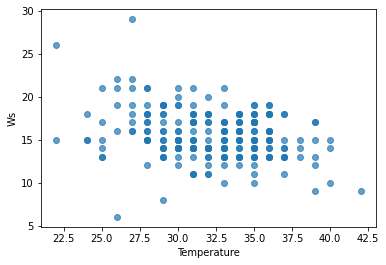

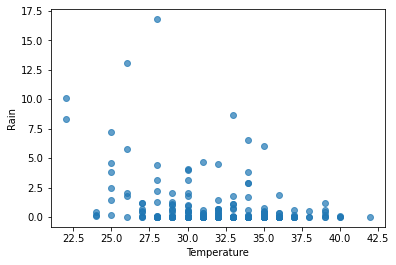

In [48]:
plt.scatter(df['Temperature'],df['RH'], alpha = 0.7)
plt.xlabel('Temperature')
plt.ylabel('RH')
plt.show()

plt.scatter(df['Temperature'],df['Ws'], alpha = 0.7)
plt.xlabel('Temperature')
plt.ylabel('Ws')
plt.show()

plt.scatter(df['Temperature'],df['Rain'], alpha = 0.7)
plt.xlabel('Temperature')
plt.ylabel('Rain')
plt.show()

Observations:

1. Rain and Temperature are not that much related

In [49]:
## I will drop columns from above observations

df=df.drop('DMC',axis=1)
df=df.drop('FWI',axis=1)
df=df.drop('DC',axis=1)
df=df.drop('Time',axis=1)

In [50]:
df.reset_index()

,index,Temperature,RH,Ws,Rain,FFMC,ISI,BUI,Classes
0,0,29.0,57.0,18.0,0.0,65.7,1.3,3.4,not fire
1,1,29.0,61.0,13.0,1.3,64.4,1.0,3.9,not fire
2,2,26.0,82.0,22.0,13.1,47.1,0.3,2.7,not fire
3,3,25.0,89.0,13.0,2.5,28.6,0.0,1.7,not fire
4,4,27.0,77.0,16.0,0.0,64.8,1.2,3.9,not fire
...,...,...,...,...,...,...,...,...,...
240,241,30.0,65.0,14.0,0.0,85.4,4.5,16.9,fire
241,242,28.0,87.0,15.0,4.4,41.1,0.1,6.2,not fire
242,243,27.0,87.0,29.0,0.5,45.9,0.4,3.4,not fire
243,244,24.0,54.0,18.0,0.1,79.7,1.7,5.1,not fire


## MODEL BUILDING AND TRAINING

Spiliting Data into Training and Test

In [51]:
df_test=df[df['Classes'].isnull()]
df_train=df[~df['Classes'].isnull()]

In [52]:
X=df_train.drop('Classes',axis=1)
y=df_train['Classes']

### Scaling Data

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

sc=StandardScaler()

## Splitting Train and Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

X_train

array([[-7.96293221e-02,  9.30759772e-02, -5.58744237e-01,
        -3.61631529e-01,  6.15616086e-01,  1.63012163e-01,
        -3.38856807e-01],
       [-3.26684398e-01, -7.63114152e-01,  1.36193908e+00,
        -1.09911021e-01, -1.93360375e-02, -5.70069248e-01,
        -3.08675229e-01],
       [ 4.14480830e-01, -2.36227919e-01, -9.42880899e-01,
        -2.77724693e-01,  9.79920722e-02, -6.38795631e-01,
         5.59045138e-01],
       [ 4.14480830e-01, -5.65531815e-01,  9.77802414e-01,
        -3.61631529e-01,  7.53649156e-01,  9.87728751e-01,
         6.64680661e-01],
       [-5.73739474e-01, -1.35586117e+00, -1.74607574e-01,
        -3.61631529e-01,  7.81255770e-01,  8.04458398e-01,
        -2.93584440e-01],
       [ 1.40270114e+00, -6.31392594e-01, -5.58744237e-01,
        -3.61631529e-01,  1.51722300e-02, -6.61704425e-01,
        -9.50033762e-01],
       [-1.06784963e+00, -2.36227919e-01,  9.77802414e-01,
         5.61343668e-01, -9.92469183e-01, -8.44974778e-01,
        -1.0330331

## Algo 1 : Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 

clf_linReg = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred_linReg=clf_linReg.predict(X_test)

test_accuracy_linReg = accuracy_score(y_test, y_pred_linReg)*100
#test_auc_roc_linReg = roc_auc_score(y_test, y_pred_linReg)*100
confusion_matrix_linReg = confusion_matrix(y_test, y_pred_linReg)

print(confusion_matrix_linReg)
#print('Testing AUC: %.4f %%' % test_auc_roc_linReg)
print('Testing accuracy: %.4f %%' % test_accuracy_linReg)

[[69  6]
 [ 1 46]]
Testing accuracy: 94.2623 %


## Algo 2 : Gaussain

In [56]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 

gnb = GaussianNB()

y_pred_gaus = gnb.fit(X_train, y_train).predict(X_test)

test_accuracy_gaus = accuracy_score(y_test, y_pred_gaus)*100
#test_auc_roc_gaus = roc_auc_score(y_test, y_pred_gaus)*100
confusion_matrix_gaus = confusion_matrix(y_test, y_pred_gaus)

print(confusion_matrix_gaus)
#print('Testing AUC: %.4f %%' % test_auc_roc_gaus)
print('Testing accuracy: %.4f %%' % test_accuracy_gaus) 

print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred_gaus).sum()))

[[70  5]
 [ 1 46]]
Testing accuracy: 95.0820 %
Number of mislabeled points out of a total 122 points : 6


## Algo 3 : KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 

neigh = KNeighborsClassifier(n_neighbors=3)

y_pred_neigh = neigh.fit(X_train, y_train).predict(X_test)

test_accuracy_neigh = accuracy_score(y_test, y_pred_neigh)*100
#test_auc_roc = roc_auc_score(y_test, y_pred)*100
confusion_matrix_neigh = confusion_matrix(y_test, y_pred_neigh)

print(confusion_matrix_neigh)
#print('Testing AUC: %.4f %%' % test_auc_roc)
print('Testing accuracy: %.4f %%' % test_accuracy_neigh) 

[[66  9]
 [ 2 45]]
Testing accuracy: 90.9836 %


## Algo 4 : Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

clf_decTree = DecisionTreeClassifier(random_state=0)

y_pred_decTree = clf_decTree.fit(X_train, y_train).predict(X_test)

test_accuracy_decTree = accuracy_score(y_test, y_pred_decTree)*100
#test_auc_roc_decTree = roc_auc_score(y_test, y_pred_decTree)*100
confusion_matrix_decTree = confusion_matrix(y_test, y_pred_decTree)

print(confusion_matrix_decTree)
#print('Testing AUC: %.4f %%' % test_auc_roc_decTree)
print('Testing accuracy: %.4f %%' % test_accuracy_decTree)

cross_val_score(clf_decTree,X_train, y_train, cv=10)


[[71  4]
 [ 0 47]]
Testing accuracy: 96.7213 %


array([1.        , 0.91666667, 1.        , 1.        , 1.        ,
       0.91666667, 0.91666667, 1.        , 0.91666667, 1.        ])

## Algo 5 : Random Foreset

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix

clf_rndFor = RandomForestClassifier(max_depth=2, random_state=0)
clf_rndFor.fit(X_train, y_train)

y_pred_rndFor=clf_rndFor.predict(X_test)

test_accuracy_rndFor = accuracy_score(y_test, y_pred_rndFor)*100
#test_auc_roc = roc_auc_score(y_test, y_pred)*100
confusion_matrix_rndFor = confusion_matrix(y_test, y_pred_rndFor)

print(confusion_matrix_rndFor)
#print('Testing AUC: %.4f %%' % test_auc_roc)
print('Testing accuracy: %.4f %%' % test_accuracy_rndFor)

import pickle
pickle.dump(clf_rndFor,open('model_predict.pkl','wb'))

picked_model=pickle.load(open('model_predict.pkl','rb'))
picked_model.predict(X_test)

[[72  3]
 [ 0 47]]
Testing accuracy: 97.5410 %


array(['fire', 'fire', 'not fire', 'fire', 'fire', 'not fire', 'fire',
       'not fire', 'fire', 'fire', 'not fire', 'not fire', 'fire',
       'not fire', 'fire', 'fire', 'fire', 'not fire', 'fire', 'fire',
       'fire', 'fire', 'not fire', 'fire', 'not fire', 'fire', 'not fire',
       'fire', 'fire', 'fire', 'fire', 'fire', 'not fire', 'fire',
       'not fire', 'fire', 'fire', 'not fire', 'not fire', 'fire',
       'not fire', 'fire', 'not fire', 'fire', 'not fire', 'not fire',
       'not fire', 'not fire', 'fire', 'not fire', 'fire', 'fire',
       'not fire', 'not fire', 'fire', 'fire', 'fire', 'not fire', 'fire',
       'fire', 'fire', 'not fire', 'not fire', 'not fire', 'not fire',
       'fire', 'fire', 'not fire', 'fire', 'fire', 'fire', 'not fire',
       'fire', 'fire', 'fire', 'fire', 'not fire', 'fire', 'not fire',
       'not fire', 'fire', 'fire', 'fire', 'fire', 'not fire', 'not fire',
       'not fire', 'not fire', 'fire', 'not fire', 'not fire', 'not fire',
      

## Algo 6 : SVC

In [60]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix

clf_svc=SVC()

clf_svc.fit(X_train, y_train)

y_pred_svc=clf_svc.predict(X_test)

test_accuracy_svc = accuracy_score(y_test, y_pred_svc)*100
#test_auc_roc = roc_auc_score(y_test, y_pred)*100
confusion_matrix_svc = confusion_matrix(y_test, y_pred_svc)

print(confusion_matrix_svc)
#print('Testing AUC: %.4f %%' % test_auc_roc)
print('Testing accuracy: %.4f %%' % test_accuracy_svc) 

[[68  7]
 [ 1 46]]
Testing accuracy: 93.4426 %
